<a href="https://colab.research.google.com/github/dajeong25/KDT_team4_FinalPJT/blob/main/python_big_data%EB%B9%85%EB%B6%84%EA%B8%B0_%EC%8B%A4%EA%B8%B0_%EC%A0%9C1%EC%9C%A0%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 데이터 탐색**

In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
cac

> 깃허브에 있는 csv 파일을 읽어와서 데이터프레임 df로 넣는다.
https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

1. 범주형 변수 변환
2. 데이터 탐색으로 결측치 있는 변수 확인하기
3. Pclass 변수 분석
4. Fare 변수 분석
5. Sex 변수 분석

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 변주형 변수 변환
df['Pclass'] = df['Pclass'].astype(str)
df['Survived'] = df['Survived'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [ ]:
# 데이터 탐색으로 결측치 있는 변수 확인하기
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


>> 결측치 : Age	, Cabin, Embarked

In [ ]:
# Pclass 변수 분석
pclass = df.groupby('Pclass')
pclass.size()

Pclass
1    216
2    184
3    491
dtype: int64

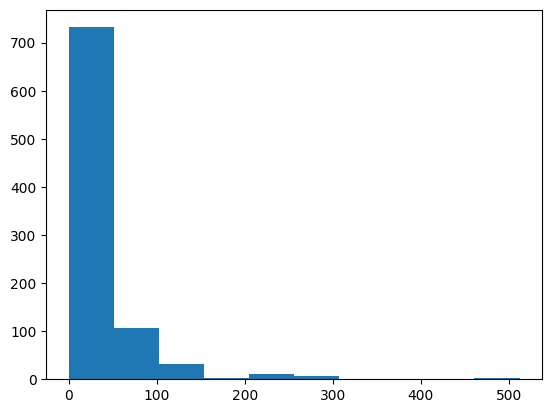

In [ ]:
plt.hist(df['Fare'])
plt.show()

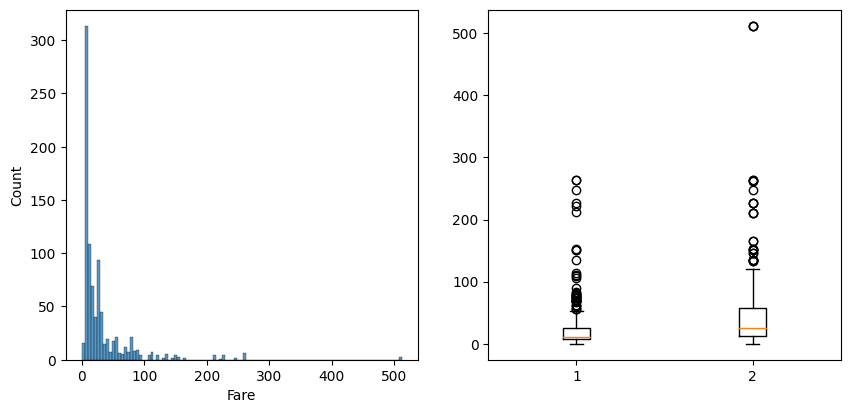

In [ ]:
import seaborn as sns
# Histogram
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.histplot(df["Fare"], ax=ax1)

# 데이터 분리
data_0 = df[df["Survived"]=="0"]["Fare"] # 사망자의 요금 데이터
data_1 = df[df["Survived"]=="1"]["Fare"] # 생존자의 요금 데이터

# Boxplot – Survived 값에 따른 Fare 값의 분포를 보여준다.
ax2.boxplot([data_0, data_1])
plt.show()

In [ ]:
# Sex 변수 분석
sex = df.groupby('Sex')
print(sex.size())

Sex
female    314
male      577
dtype: int64


# **파이썬 데이터 변환**

## 표준 정규화
> 한국인 1,000명의 연간 육류소비량이 53.9kg 표준편차 5kg의 정규분포를 따르고, 일본인 1000명의 연간 육류소비량이 32.7kg 표준편차 4kg의 정규분포를 따를때, 두 집단의 육류 소비량을 평균 0, 표준편차 1인 표준정규분포로 표준화하라

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 한국인, 일본인 각 성인 1000명 육류소비량 데이터 생성
korean = 5*np.random.randn(1000) + 53.9
japan = 4*np.random.randn(1000) + 32.7

# 2. 데이터 프레임 생성
meat_df = pd.DataFrame({'한국인':korean, "일본인":japan})
meat_df.head()

,한국인,일본인
0,53.959953,28.274765
1,50.983557,30.701976
2,48.739795,34.717796
3,60.023844,37.181803
4,52.414777,33.960716


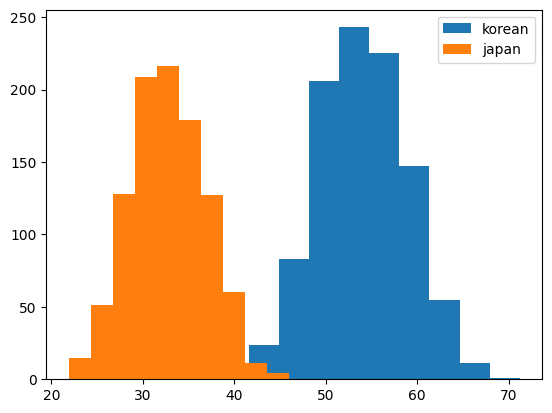

In [ ]:
# 3. 시각화
plt.hist(korean, label ='korean')
plt.hist(japan, label ='japan')

plt.legend()
plt.show()

1. Z-표준화

In [ ]:
# 표준정규화함수에 의한 변환 zscore() 함수 이용
# 기존 데이터프레임에 새로운 Z-표준화된 컬럼을 추가
import scipy.stats as ss

meat_df['한국인_정규화1'] = ss.zscore(korean)
meat_df['일본인_정규화1'] = ss.zscore(japan)
meat_df.head()

,한국인,일본인,한국인_정규화1,일본인_정규화1
0,53.959953,28.274765,0.001164,-1.096370
1,50.983557,30.701976,-0.608398,-0.497777
2,48.739795,34.717796,-1.067917,0.492595
3,60.023844,37.181803,1.243040,1.100263
4,52.414777,33.960716,-0.315286,0.305886


In [ ]:
# 표준정규화 수식을 직접 입력
# 기존 데이터프레임에 새로운 Z-표준화된 컬럼을 추가
meat_df['한국인_정규화2'] = (korean - np.mean(korean)) / np.std(korean)
meat_df['일본인_정규화2'] = (japan - np.mean(japan)) / np.std(japan)
meat_df.head()

,한국인,일본인,한국인_정규화1,일본인_정규화1,한국인_정규화2,일본인_정규화2
0,53.959953,28.274765,0.001164,-1.096370,0.001164,-1.096370
1,50.983557,30.701976,-0.608398,-0.497777,-0.608398,-0.497777
2,48.739795,34.717796,-1.067917,0.492595,-1.067917,0.492595
3,60.023844,37.181803,1.243040,1.100263,1.243040,1.100263
4,52.414777,33.960716,-0.315286,0.305886,-0.315286,0.305886


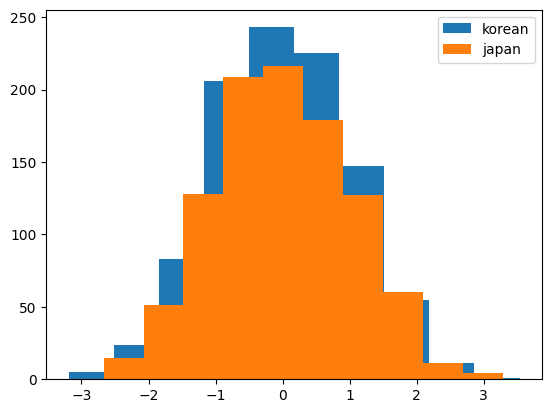

In [ ]:
# 표준화된 데이터에 대한 히스토그램
plt.hist(meat_df['한국인_정규화1'], label ='korean')
plt.hist(meat_df['일본인_정규화1'], label ='japan')

plt.legend()
plt.show()

In [ ]:
# 사이킷런 스케일러 이용 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_df['한국인_정규화3'] = scaler.fit_transform(meat_df[['한국인']])

scaler = StandardScaler()
meat_df['일본인_정규화3'] = scaler.fit_transform(meat_df[['일본인']])

meat_df.head()

,한국인,일본인,한국인_정규화1,일본인_정규화1,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3
0,53.959953,28.274765,0.001164,-1.096370,0.001164,-1.096370,0.001164,-1.096370
1,50.983557,30.701976,-0.608398,-0.497777,-0.608398,-0.497777,-0.608398,-0.497777
2,48.739795,34.717796,-1.067917,0.492595,-1.067917,0.492595,-1.067917,0.492595
3,60.023844,37.181803,1.243040,1.100263,1.243040,1.100263,1.243040,1.100263
4,52.414777,33.960716,-0.315286,0.305886,-0.315286,0.305886,-0.315286,0.305886


2. Min-Max 정규화

In [ ]:
# Min-Max변환 MinMaxScaler() 함수 이용
# 기존 데이터프레임에 새로운 표준화된 컬럼을 추가
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
meat_df['한국인_mn'] = scaler.fit_transform(meat_df[['한국인']])

scaler = MinMaxScaler()
meat_df['일본인_mn'] = scaler.fit_transform(meat_df[['일본인']])

meat_df[['한국인', '일본인', '한국인_mn', '일본인_mn']].head()

,한국인,일본인,한국인_mn,일본인_mn
0,53.959953,28.274765,0.474774,0.264508
1,50.983557,30.701976,0.384126,0.365133
2,48.739795,34.717796,0.315790,0.531618
3,60.023844,37.181803,0.659455,0.633769
4,52.414777,33.960716,0.427715,0.500232


In [ ]:
# Min-Max변환 수식이용
meat_df['한국인_mn2'] = (meat_df[['한국인']] - np.min(korean)) / (np.max(korean) - np.min(korean))
meat_df['일본인_mn2'] = (meat_df[['일본인']] - np.min(japan)) / (np.max(japan) - np.min(japan))
meat_df[['한국인', '일본인', '한국인_mn2', '일본인_mn2']].head()

,한국인,일본인,한국인_mn2,일본인_mn2
0,53.959953,28.274765,0.474774,0.264508
1,50.983557,30.701976,0.384126,0.365133
2,48.739795,34.717796,0.315790,0.531618
3,60.023844,37.181803,0.659455,0.633769
4,52.414777,33.960716,0.427715,0.500232


## 정규 분포변환
> USJudgeRatings 데이터셋(미국 변호사들이 고등법원판사를 평가한 데이터) https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USJudgeRatings.csv

1. 데이터읽기
2. 왜도계산 : CONT(변호사와 판사 접촉수), PHYS(판사의 신체적 능력)
3. log() 변환
4. log10() 변환

In [ ]:
import pandas as pd
import scipy.stats as ss
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USJudgeRatings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43 non-null     object 
 1   CONT        43 non-null     float64
 2   INTG        43 non-null     float64
 3   DMNR        43 non-null     float64
 4   DILG        43 non-null     float64
 5   CFMG        43 non-null     float64
 6   DECI        43 non-null     float64
 7   PREP        43 non-null     float64
 8   FAMI        43 non-null     float64
 9   ORAL        43 non-null     float64
 10  WRIT        43 non-null     float64
 11  PHYS        43 non-null     float64
 12  RTEN        43 non-null     float64
dtypes: float64(12), object(1)
memory usage: 4.5+ KB


In [ ]:
df.head()

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [ ]:
# CONT(변호사와 판사 접촉수), PHYS(판사의 신체적 능력) > 지정한 컬럼의 왜도 계산 
print(ss.skew(df.CONT)) # 양수
print(ss.skew(df.PHYS)) #음수

1.0859724796276253
-1.5582154642293153


In [ ]:
# log변환
df['CONT_log'] = np.log(df.CONT) 
print(ss.skew(df.CONT_log)) # 양수

df['PHYS_log'] = np.log(np.max(df.PHYS + 1) - df.PHYS)
print(ss.skew(df.PHYS_log)) #음수

0.6555571886692603
0.5824357748750443


In [ ]:
# log10 변환
df['CONT_log10'] = np.log10(df.CONT) 
print(ss.skew(df.CONT_log10)) # 양수

df['PHYS_log10'] = np.log10(np.max(df.PHYS + 1) - df.PHYS)
print(ss.skew(df.PHYS_log10)) #음수

0.6555571886692441
0.5824357748750438


## 범주화, 이산형화
> 임의 예제 생성

1. 조건 사용해서 직접 지정
2. cut() 함수 
3. qcut() 함수

In [ ]:
# 수학점수 (Math_score) 예제 생성
data = [["철수",52], ["영희",92], ["미영",84], ["시완",71], ["미경",65], ["영환",81], ["숙경",66], ["부영",77], ["민섭",73], ["보연",74]]
df = pd.DataFrame(data,columns=['이름','수학점수'])
display(df)
print(np.mean(df["수학점수"]))

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


73.5


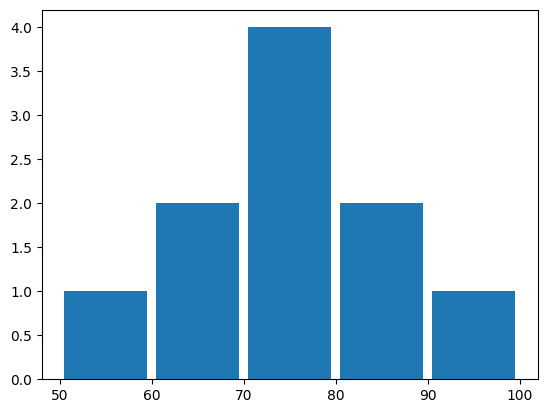

In [ ]:
# 시각화 > 히스토그램, 범위 50~100, 5개 구간
import matplotlib.pyplot as plt
plt.hist(df['수학점수'], bins = 5, range=[50, 100], rwidth=0.9)
plt.show()

In [ ]:
# 조건을 사용해서 구간을 직접 지정
df['등급'] = 0
df.loc[(df['수학점수']<60), '등급'] = 'F'
df.loc[(df['수학점수']>=60)&(df['수학점수']<70), '등급'] = 'D'
df.loc[(df['수학점수']>=70)&(df['수학점수']<80), '등급'] = 'C'
df.loc[(df['수학점수']>=80)&(df['수학점수']<90), '등급'] = 'B'
df.loc[(df['수학점수']>=90), '등급'] = 'A'
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [ ]:
# cut() 함수 사용
df['등급_cut'] = pd.cut(x=df['수학점수'], bins=[0,60,70,80,90, 100], labels=['F','D','C','B','A'], include_lowest=True)
df

,이름,수학점수,등급,등급_cut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,B
3,시완,71,C,C
4,미경,65,D,D
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,C
8,민섭,73,C,C
9,보연,74,C,C


In [ ]:
# qcut() 함수 사용 > 균등하게 분리됨
df['등급_qcut'] = pd.qcut(x=df['수학점수'], q=5, labels=['F','D','C','B','A'])
df

,이름,수학점수,등급,등급_cut,등급_qcut
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F
5,영환,81,B,B,B
6,숙경,66,D,D,D
7,부영,77,C,C,B
8,민섭,73,C,C,C
9,보연,74,C,C,C


# **차원축소**

>  iris 데이터(여러 붓꽃의 꽃잎과 꽃받침의 너비와 길이에 대한 관측치를 모은 자료) <br>
> https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

1. 데이터 준비 : <br>
  <1> 연속형 변수와 범주형 변수 분리 <br>
  <2> 변수 정규화
2. PCA 분석 수행

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# 연속형 변수와 범주형 변수 분리
species = iris.species
iris.drop(['species'], inplace=True, axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
species.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [ ]:
# 변수 정규화
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.preprocessing import StandardScaler

for col in iris.columns:
  standard_scaler = StandardScaler()
  iris[col] = standard_scaler.fit_transform(iris[[col]])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
p_score = pca.fit_transform(iris)
print(p_score.shape)
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


> 위의 0번과 1번 만으로 90%이상의 설명력을 가질 수 있음 => 2개로 차원 축소 가능

# 결측치 처리


## 1. 결측치 확인과 제거
> 타이타닉 데이터 : https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 결측치가 있는 모든 행 제거
tt_new = titanic.dropna(axis=0)
print(tt_new.isnull().sum().sum())
tt_new.shape

0


(183, 12)

## 2. 결측치 대체

In [ ]:
# Age 컬럼의 결측치를 평균으로 대체
print(titanic.Age.mean())
titanic['Age'] = titanic.Age.fillna(titanic.Age.mean())
print(titanic.Age.isnull().sum())

29.69911764705882
0


In [ ]:
# Embarked 컬럼의 결측치를 최빈값으로 대체
print(titanic.Embarked.mode()[0])
titanic['Embarked'] = titanic.Embarked.fillna(titanic.Embarked.mode()[0])
print(titanic.Embarked.isnull().sum())

S
0


In [ ]:
# Embarked 컬럼의 결측치를 인접값으로 대체
titanic.Embarked.fillna(method='ffill', inplace=True)

In [ ]:
# 결측치를 그룹별 평균값으로 대체
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print(titanic.groupby("Sex")['Age'].mean())
print(titanic.groupby("Pclass")['Age'].mean())

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [ ]:
titanic.Age.fillna(titanic.groupby("Pclass")['Age'].transform('mean'), inplace=True)
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q


# 이상치 처리

1. 데이터 준비
2. 시각화
3. IQR 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


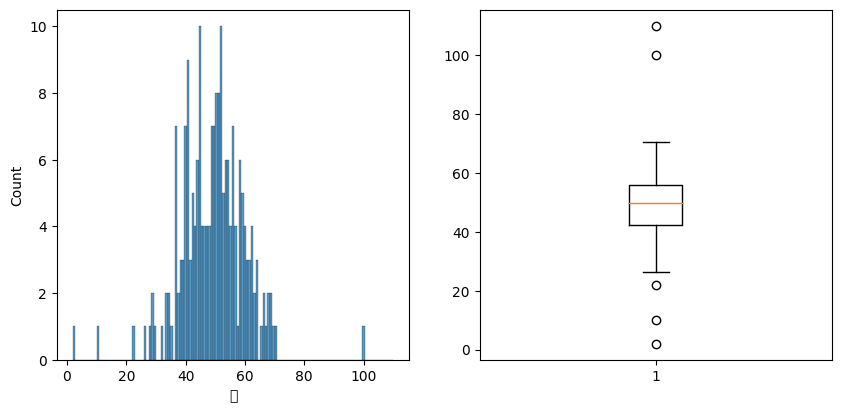

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 10 * np.random.randn(200) + 50
df = pd.DataFrame({"값": data})

# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 시각화
import seaborn as sns

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.histplot(df['값'], bins=20, ax=ax1)

# Boxplot – Survived 값에 따른 Fare 값의 분포를 보여준다.
ax2.boxplot(df['값'])
plt.show()

In [ ]:
# IQR
Q1 = df['값'].quantile(0.25)
Q3 = df['값'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

13.37195165393284


In [ ]:
df['값'].describe()

count    204.000000
mean      49.516093
std       11.621890
min        2.000000
25%       42.461004
50%       49.859252
75%       55.832955
max      110.000000
Name: 값, dtype: float64

In [ ]:
print(df['값'].describe()['75%'] - df['값'].describe()['25%'])

13.37195165393284


In [ ]:
# 이상치 검출
condition = df['값'] > (Q3 + IQR * 1.5)
upper = df[condition]
condition = df['값'] < (Q1 - IQR * 1.5)
lower = df[condition]
print(lower, upper, sep='\n')

             값
20   22.041634
201   2.000000
203  10.000000
         값
202  100.0
204  110.0


# 평활화 Smoothing
> Lynx 데이터(1821년 ~ 1934년 캐나다 시라소니의 수에 대한 시계열 데이터) https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/lynx.csv

1. 데이터 준비
2. 10년 단순이동평균
3. 10년 지수가중이동평균

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/lynx.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  114 non-null    int64
 1   time        114 non-null    int64
 2   value       114 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB


In [ ]:
display(df.describe())
df.head()

,Unnamed: 0,time,value
count,114.000000,114.000000,114.000000
mean,57.500000,1877.500000,1538.017544
std,33.052988,33.052988,1585.843914
min,1.000000,1821.000000,39.000000
25%,29.250000,1849.250000,348.250000
50%,57.500000,1877.500000,771.000000
75%,85.750000,1905.750000,2566.750000
max,114.000000,1934.000000,6991.000000


,Unnamed: 0,time,value
0,1,1821,269
1,2,1822,321
2,3,1823,585
3,4,1824,871
4,5,1825,1475


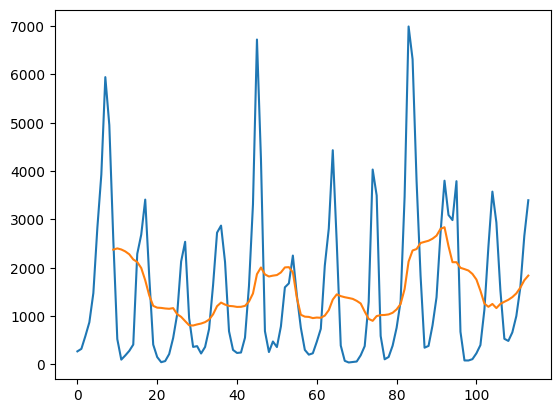

In [ ]:
# 10년 단순이동평균
df['sma'] = df['value'].rolling(10).mean()

plt.plot(df['value'])
plt.plot(df['sma'])
plt.show()

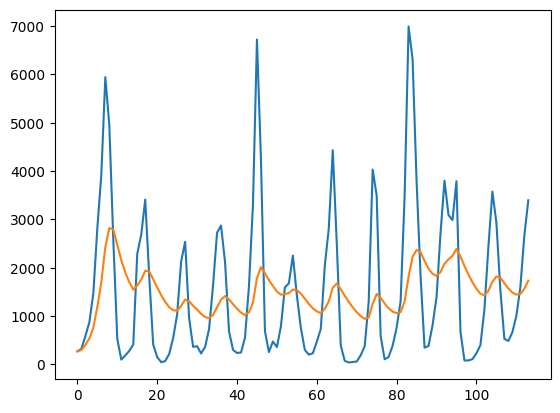

In [ ]:
# 10년 지수가중이동평균
df['ema'] = df['value'].ewm(10).mean()

plt.plot(df['value'])
plt.plot(df['ema'])
plt.show()